In [5]:
import os
import tempfile
from dipy.segment.mask import median_otsu
from dipy.core.gradients import gradient_table
from dipy.reconst.shm import CsaOdfModel
from dipy.direction import peaks_from_model
from dipy.direction import ProbabilisticDirectionGetter
from dipy.reconst.csdeconv import ConstrainedSphericalDeconvModel
from dipy.direction import peaks_from_model
from dipy.tracking import utils
from dipy.viz import window, actor
from nilearn.plotting import plot_anat, plot_roi, plot_stat_map
from nilearn.image import index_img, iter_img, new_img_like, math_img
from IPython.display import Image
from xvfbwrapper import Xvfb
import nibabel as nb
import pylab as plt
import numpy as np

/home/local/VANDERBILT/kanakap/miniconda3/envs/gradtensor/lib/python3.7/site-packages/nilearn/datasets/__init__.py:89: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [6]:
# helper function for plotting woth dipy and VTK on a headless system
def show_image(actor, size=(1000,1000)):
    with tempfile.TemporaryDirectory() as tmp_dir:
        temp_filename = os.path.join(tmp_dir, 'tmp.png')
        with Xvfb() as xvfb:
            ren = window.Renderer()
            ren.add(actor)
            window.record(ren, n_frames=1, out_path=temp_filename, size=size)
            window.clear(ren)
        return Image(filename=temp_filename) 

In [8]:
img = nb.load('/home/local/VANDERBILT/kanakap/gradtensor_data/10_29_2019_human_repositioned/3tb/posA/OUTPUTS_signal_estimate/posA_3tb_est_sig.nii')

data = img.get_fdata()
data.shape
gtab = gradient_table('/home/local/VANDERBILT/kanakap/gradtensor_data/10_29_2019_human_repositioned/3tb/posA/INPUTS/dwmri.bval', '/home/local/VANDERBILT/kanakap/gradtensor_data/10_29_2019_human_repositioned/3tb/posA/INPUTS/dwmri.bvec')
(gtab.bvals == 0).sum()

1

In [9]:
gtab.bvecs.shape

(25, 3)

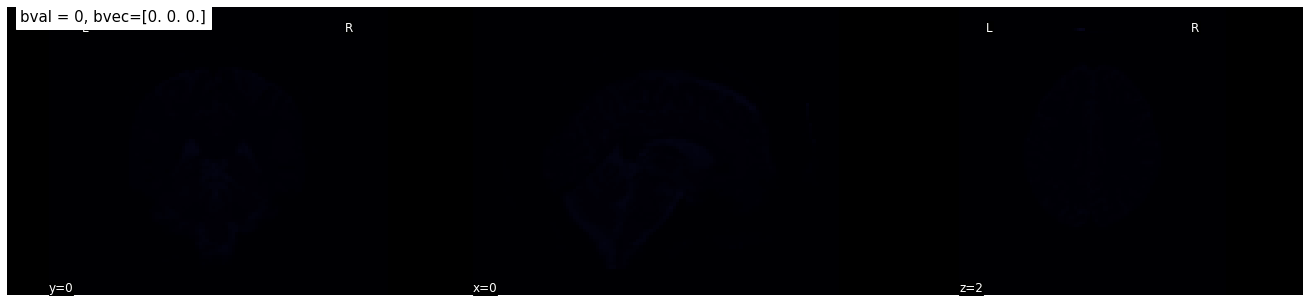

In [14]:
i = 0
cur_img = index_img(img, i)
plot_anat(cur_img, cut_coords=(0,0,2), draw_cross=False, figure=plt.figure(figsize=(18,4)), cmap='magma',
              vmin=0, vmax=400, title="bval = %g, bvec=%s"%(gtab.bvals[i], str(np.round(gtab.bvecs[i,:],2))))


In [15]:
img.shape

(96, 96, 68, 25)

In [17]:
cur_img.shape

(96, 96, 68)

In [25]:
data[:,:,:,0]

memmap([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e

(96, 96, 68)


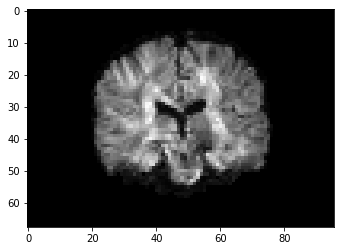

In [34]:
slice = data[:,:,:,15]
print(slice.shape)
slice = slice[:,45,:]
m = slice.min()
M = slice.max()
slice = np.flip(np.rot90(slice,3))
slice = np.nan_to_num(slice)
cmap = plt.get_cmap('gray')
plt.imshow(np.abs(slice), vmin=m, vmax=M, cmap=cmap)

In [29]:
ten_raw = nb.load('/home/local/VANDERBILT/kanakap/gradtensor_data/10_29_2019_human_repositioned/3tb/posA/INPUTS/brainA__fa.nii').get_fdata()
ten_raw.shape

(96, 96, 68)